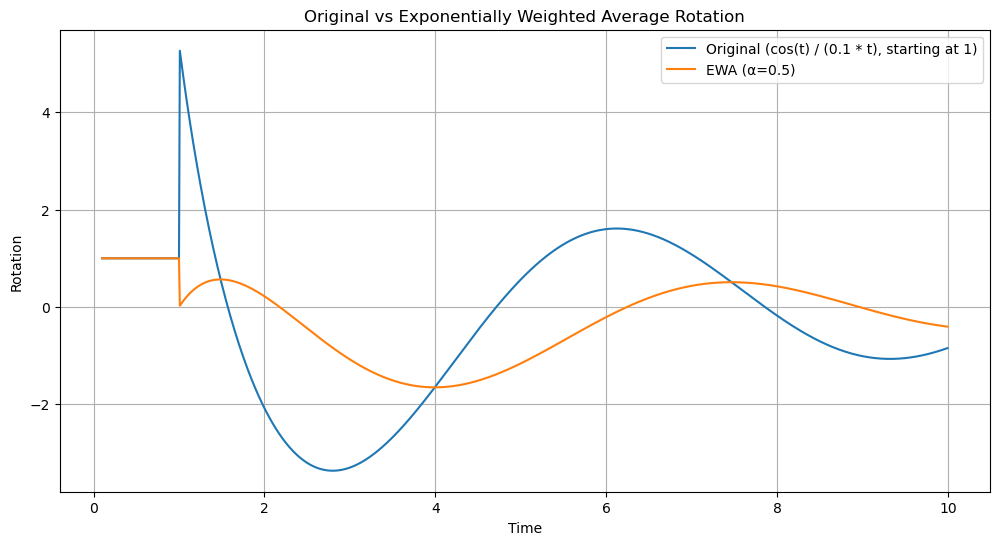

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def original_rotation(t):
    return 1 if t < 1 else np.cos(t) / (0.1 * t)

def ewa_rotation(t, alpha=0.1):
    if t < 1:
        return 1  # EWA also starts at 1 when t < 1

    # Integrate cos(s) / (0.1 * s) weighted by exp(-alpha * (t - s)) from 1 to t
    def integrand(s):
        return alpha * np.exp(-alpha * (t - s)) * (np.cos(s) / (0.1 * s))

    result, _ = quad(integrand, 1, t)  # Start integration from s = 1
    return result

# Visualize the functions
def plot_comparison(t_max=10, alpha=0.5):
    t = np.arange(0.1, t_max, 0.01)
    
    original = np.array([original_rotation(i) for i in t])
    smoothed = np.array([ewa_rotation(i, alpha) for i in t])
    
    plt.figure(figsize=(12, 6))
    plt.plot(t, original, label='Original (cos(t) / (0.1 * t), starting at 1)')
    plt.plot(t, smoothed, label=f'EWA (α={alpha})')
    plt.xlabel('Time')
    plt.ylabel('Rotation')
    plt.title('Original vs Exponentially Weighted Average Rotation')
    plt.legend()
    plt.grid(True)
    plt.show()

# Test and plot
plot_comparison()
